In [4]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import image_dataset_from_directory
from tensorflow import clip_by_value
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow import random as tf_random
import keras_cv
from keras import layers, models
import os
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.regularizers import l1_l2
input_shape = (32, 32, 3)
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input, Rescaling

# load data

In [2]:
train_ds = image_dataset_from_directory(
    '../data/cinic-10_image_classification_challenge-dataset/train/',
    validation_split=0.2,
    subset='training',
    seed = 420,
    image_size=(32,32),
    batch_size=32,
    label_mode = 'categorical')

class_names = train_ds.class_names

val_ds = image_dataset_from_directory(
    '../data/cinic-10_image_classification_challenge-dataset/train/',
    validation_split=0.2,
    subset='validation',
    seed = 420,
    image_size=(32,32),
    batch_size=32,
    label_mode = 'categorical')

Found 90000 files belonging to 10 classes.
Using 72000 files for training.
Found 90000 files belonging to 10 classes.
Using 18000 files for validation.


In [18]:
# def load_and_preprocess_image(image_path, label):
#     # Load image
#     image = tf.io.read_file(image_path)
#     # Decode PNG image to tensor
#     image = tf.image.decode_png(image, channels=3)  # Adjust channels according to your images
#     # Normalize pixel values to range [0, 1]
#     image = tf.image.convert_image_dtype(image, tf.float32)
#     return image, label


# def preprocess_data():

#     class_names = os.listdir(data_dir)

#     image_paths = []
#     labels = []
#     for class_name in class_names:
#         class_dir = os.path.join(data_dir, class_name)
#         for image_name in os.listdir(class_dir):
#             image_path = os.path.join(class_dir, image_name)
#             image_paths.append(image_path)
#             labels.append(class_names.index(class_name))

#     # Create TensorFlow Dataset from the loaded data
#     dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
#     dataset = dataset.map(load_and_preprocess_image)

#     dataset = dataset.shuffle(buffer_size=10000)

# # Split the dataset into train, validation, and test sets
#     train_size = int(0.8 * len(dataset))
#     test_size = int(0.2 * len(dataset))

#     train_dataset = dataset.take(train_size)
#     test_dataset = dataset.skip(train_size).take(test_size)
#     train_dataset = train_dataset.shuffle(buffer_size=len(image_paths)).batch(32)
#     test_dataset = test_dataset.shuffle(buffer_size=len(image_paths)).batch(32)
#     return train_dataset, test_dataset

# pre-made dataset from cifar dataset

In [19]:
train_dataset, test_dataset = preprocess_data()

# CNN definition

In [13]:
def cnn(input_shape, l1=0.01, l2=0.01, dropout_rate=0.2):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=l1_l2(l1, l2))) # output shape is 30x30x32
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2))) # output shape is 15x15x32
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1, l2))) # output shape is 13x13x64
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2))) # output shape is 6x6x64
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))

    # model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1_l2(l1, l2)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.MaxPooling2D((2,2)))
    # model.add(layers.BatchNormalization())
    # model.add(layers.Dropout(dropout_rate))
    # Dense layers
    model.add(layers.Flatten()) # 1024
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=l1_l2(l1, l2)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax', kernel_regularizer=l1_l2(l1, l2)))

    return model


In [10]:
model = cnn(input_shape)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,259,658 (4.81 MB)

 Trainable params: 1,258,890 (4.80 MB)

 Non-trainable params: 768 (3.00 KB)

### searching for optimal dropout

In [14]:
histories = {}
for dropout_rate in np.linspace(0, 1/2, 10):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)    
    model = cnn(input_shape, True, dropout_rate=dropout_rate)
    model.compile(optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy'])
    print(f'dropout = {dropout_rate}')
    history = model.fit(train_ds, validation_data = val_ds, epochs = 5)    
    histories[dropout_rate] = {'history': history.history}

dropout = 0.0
Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 116s 50ms/step - accuracy: 0.1029 - loss: 1013.8644 - val_accuracy: 0.1024 - val_loss: 154.9450
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 110s 49ms/step - accuracy: 0.0983 - loss: 154.5016 - val_accuracy: 0.1024 - val_loss: 154.2294
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 111s 49ms/step - accuracy: 0.0990 - loss: 154.2608 - val_accuracy: 0.1024 - val_loss: 155.0517
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 112s 50ms/step - accuracy: 0.0977 - loss: 154.0106 - val_accuracy: 0.1024 - val_loss: 153.5535
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 114s 50ms/step - accuracy: 0.0977 - loss: 153.7660 - val_accuracy: 0.1024 - val_loss: 154.5997
dropout = 0.05555555555555555
Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 106s 46ms/step - accuracy: 0.1019 - loss: 1015.7307 - val_accuracy: 0.1024 - val_loss: 153.9177
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 99s 44ms/step - accuracy: 0.0994 - loss: 153.7995 - val_accuracy: 0.1024 - val_loss: 153.5822
Epo

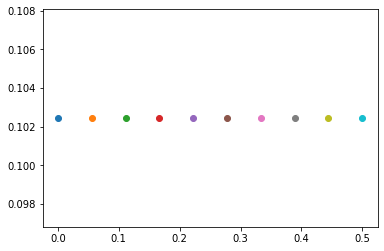

In [22]:
for dropout in histories:
    plt.scatter(dropout, histories[dropout]['history']['val_accuracy'][-1])

In [23]:
l1_range = np.linspace(0, 1, 10)  # Example: 10 values between 0 and 1
l2_range = np.linspace(0, 1, 10)  # Example: 10 values between 0 and 1

# Generate candidate combinations using grid search
search_space = [(l1, l2) for l1 in l1_range for l2 in l2_range]
for l1, l2 in search_space:
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)    
    model = cnn(input_shape, True, l1, l2)
    model.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    print(f'l1 = {l1}, l2 = {l2}')
    history = model.fit(train_dataset, epochs = 5)    
    test_loss, test_acc = model.evaluate(test_dataset)
    histories[(l1, l2)] = {'history': history.history,
                        'test_loss': test_loss,
                        'test_acc': test_acc}

l1 = 0.0, l2 = 0.0
Epoch 1/5
2250/2250 [==============================] - 32s 11ms/step - loss: 1.7577 - accuracy: 0.3706
Epoch 2/5
2250/2250 [==============================] - 33s 12ms/step - loss: 1.4970 - accuracy: 0.4550
Epoch 3/5
2250/2250 [==============================] - 31s 11ms/step - loss: 1.4155 - accuracy: 0.4888
Epoch 4/5
2250/2250 [==============================] - 31s 11ms/step - loss: 1.3661 - accuracy: 0.5063
Epoch 5/5
563/563 [==============================] - 11s 5ms/step - loss: 3.8904 - accuracy: 0.2519
l1 = 0.0, l2 = 0.1111111111111111
Epoch 1/5
2250/2250 [==============================] - 55s 18ms/step - loss: 3.3628 - accuracy: 0.3546
Epoch 2/5
2250/2250 [==============================] - 66s 25ms/step - loss: 1.9381 - accuracy: 0.3718
Epoch 3/5
2250/2250 [==============================] - 64s 22ms/step - loss: 1.9091 - accuracy: 0.3729
Epoch 4/5
2250/2250 [==============================] - 88s 31ms/step - loss: 1.8902 - accuracy: 0.3790
Epoch 5/5
563/563 [====

KeyboardInterrupt: 

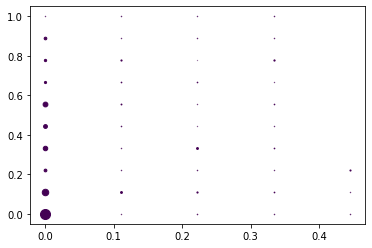

In [31]:
for (l1, l2) in histories:
    plt.scatter(l1, l2, s = histories[(l1, l2)]['test_acc']*400, c = histories[(l1, l2)]['test_acc'])

In [8]:
def cnn(dropout_rate = 0.2, batch_normalization = True):
    model = models.Sequential()
    model.add(Input((32,32,3)))
    model.add(Rescaling(1./255))

    model.add(Conv2D(64,(4,4),activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128,(4,4),activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    if batch_normalization:
        model.add(layers.BatchNormalization())
    model.add(Dense(10, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [49]:
#  base model, no dropout, no batch normalization after ReLu layers

In [6]:
model = cnn(0, False)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 29, 29, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     3,277,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,472,010 (17.06 MB)

 Trainable params: 4,472,010 (17.06 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 5)

Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 141s 62ms/step - accuracy: 0.3303 - loss: 1.7835 - val_accuracy: 0.4286 - val_loss: 1.5603
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 116s 52ms/step - accuracy: 0.4737 - loss: 1.4318 - val_accuracy: 0.4984 - val_loss: 1.3697
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 114s 51ms/step - accuracy: 0.5366 - loss: 1.2757 - val_accuracy: 0.5347 - val_loss: 1.3064
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 130s 58ms/step - accuracy: 0.5821 - loss: 1.1375 - val_accuracy: 0.5075 - val_loss: 1.4665
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 121s 54ms/step - accuracy: 0.6344 - loss: 0.9943 - val_accuracy: 0.5198 - val_loss: 1.5114


In [12]:
histories = {}
histories[(0, False)] = history
model = cnn(0, True)
history = model.fit(train_ds, validation_data = val_ds, epochs = 5)
histories[(0, True)] = history

Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 171s 75ms/step - accuracy: 0.3543 - loss: 1.9189 - val_accuracy: 0.3597 - val_loss: 1.9804
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 181s 81ms/step - accuracy: 0.4912 - loss: 1.4389 - val_accuracy: 0.4736 - val_loss: 1.5002
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 161s 71ms/step - accuracy: 0.5588 - loss: 1.2591 - val_accuracy: 0.5508 - val_loss: 1.2861
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 155s 69ms/step - accuracy: 0.6102 - loss: 1.1059 - val_accuracy: 0.5066 - val_loss: 1.5124
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 162s 72ms/step - accuracy: 0.6549 - loss: 0.9702 - val_accuracy: 0.5347 - val_loss: 1.3931


# base model without any augmentations

In [13]:
for dropout in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]:
    for batch_normalization in [False, True]:
        model = cnn(dropout, batch_normalization)
        history = model.fit(train_ds, validation_data = val_ds, epochs = 5)
        histories[(dropout, batch_normalization)] = history

Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 139s 61ms/step - accuracy: 0.3328 - loss: 1.7821 - val_accuracy: 0.4490 - val_loss: 1.5015
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 138s 61ms/step - accuracy: 0.4792 - loss: 1.4233 - val_accuracy: 0.4966 - val_loss: 1.3715
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 150s 67ms/step - accuracy: 0.5494 - loss: 1.2523 - val_accuracy: 0.4928 - val_loss: 1.4484
Epoch 4/5
 385/2250 ━━━━━━━━━━━━━━━━━━━━ 2:14 72ms/step - accuracy: 0.5799 - loss: 1.1427

KeyboardInterrupt: 